# Dominik Szot, 14.04.2023
# Laboratorium 05 
# Aproksymacja

## Zadanie 1 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as scp
import scipy.integrate as integrate

Inicjalizowanie zmiennych, tworzenie danych

In [7]:
years = np.array([1900,1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980])
points = np.array([76212168, 92228496, 106021537, 123202624, 132164569,  151325798, 179323175,  203302031,  226542199])

actual_value = 248709873
difference_array = np.zeros(7)
AIC = np.zeros(7)

new_years = np.arange(1900, 1991, 1)
new_points = []
cooeficient_vector = []

Funkcja tworząca macierz jednomianów

In [8]:
def create_matrix(pow: int):
    matrix = np.zeros((9, pow+1))
    for i in range(len(years)):
        for j in range(pow+1):
            matrix[i][j] = (years[i] ** j)

    return matrix

Wartość wielomianu będę obliczał korzystając z Algorytmu Hornera.

In [9]:
def horner(L, x):
    i = len(L) - 1
    result = L[i]
    while i > 0:
        i = i - 1
        result = result*x + L[i]

    return result

Następnie wykonuję aproksymację średniokwadratową punktową populacji na przedziale [1900,1980] wielomianami stopnia m dla <= m <= 6 oraz dokonuję ekstapolacji wielomianu do roku 1990

Stopień wielomianu  Wartość błędu względnego
0                                   0.423549
1                                   0.423549
2                                   0.051875
3                                   0.024137
4                                3520.012099
5                                3655.667837
6                              223723.557911

Stopień wielomianu  Wartość kryterium informacyjnego Akaikego
0                                                  -35.007968
1                                                  -67.772498
2                                                  -86.847996
3                                                 -104.645220
4                                                 -247.918961
5                                                 -278.875719
6                                                 -317.115865


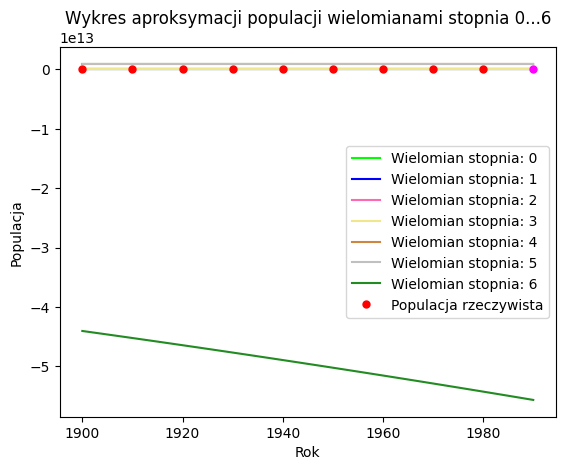

In [10]:
color = ["lime","blue","hotpink","khaki","peru","silver","forestgreen"]

for i in range(0,7):
    p_matrix = create_matrix(i)
    cooeficient_vector.append(np.linalg.lstsq(p_matrix,points,rcond=-1)[0])
    new_points = [horner(cooeficient_vector[i-1], x) for x in new_years]

    difference_array[i] = np.abs(actual_value - new_points[90])/actual_value
    sqr_diff = [(new_points[10*i] - points[i])**2 for i in range(len(years))]

    k = i+1
    n = len(years)
    AIC[i] = 2*k*(k+1)/(n-k-1) + 2*k-k*np.log(sum(sqr_diff)/k)

    plt.plot(new_years,new_points,label="Wielomian stopnia: "+ str(i),color=color[i])

# plt.scatter(years,points)
plt.plot(years, points, ".", markersize = 10, color = "red", label="Populacja rzeczywista")
plt.plot(1990, actual_value, ".", markersize = 10, color ="magenta")
plt.legend()

plt.xlabel("Rok")
plt.ylabel("Populacja")
plt.title("Wykres aproksymacji populacji wielomianami stopnia 0...6")

df2 = pd.DataFrame(data=difference_array, index=[0,1,2,3,4,5,6], columns=["Wartość błędu względnego"])
df2 = df2.rename_axis('Stopień wielomianu', axis=1)
print(df2)
print()

df3 = pd.DataFrame(data=AIC, index=[0,1,2,3,4,5,6], columns=["Wartość kryterium informacyjnego Akaikego"])
df3 = df3.rename_axis('Stopień wielomianu', axis=1)
print(df3)

Najmniejszy błąd bezwzględny posiada wielomian stopnia 3.<br />
Najlepsza wartość kryterium Akaikego występuje dla wielomianu stopnia 5.<br />

Warto zauważyć że wyższy stopień wielomianu nie zawsze wpływa pozytywnie na dokładność wyników.<br /> 
Dla wielomianu stopnia 6 wartość kryterium Akaikego jest już dużo gorsza niż wartość dla wielomianu stopnia 5<br />

# Zadanie 2